In [45]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def create_plot(real, resp):
    assert(len(real) == len(resp))
    time = list(range(len(resp)))
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(15)

    plt.plot(time, real,'g-o', label = "real")
    plt.plot(time, resp,'r-o', label = "observation")
    plt.xlabel('Entry number')
    plt.ylabel('Observed similarity')
    plt.legend()
    
    plt.show()

def simple_plot(x, reysp):
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(15)

    plt.plot(x, y,'g-o', label = "real")
    plt.xlabel('Itteration')
    plt.ylabel('Observed difference')
    plt.legend()
    
    plt.show()

def bar_plot(y):
    x = list(range(1,len(y)+1))
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(15)

    plt.bar(x, y, label = "error")
    plt.xlabel('Itteration')
    plt.ylabel('Observed difference')
    plt.legend()
 
    plt.show()

In [57]:
# ================== Load dataset to work on ==================
from dataset.loaddataset import (
    read_csv_file_parsed, create_one_index_for_sts, read_tsv_file_parsed, data_corpus_to_train
)
parsed_data = create_one_index_for_sts(
    read_tsv_file_parsed("./dataset/sts_nws.tsv")
)

In [62]:
# ===== Count Similarity =====
from comparisionEngine.cosine_similarity.word_count_sim import WordCountSim

compEngine = WordCountSim()
calculated_values = []
prediction_measure = []
size = min(200, len(parsed_data))
for data in parsed_data[:size]:
    comp_val = compEngine.wordSim(data["sentence1"], data["sentence2"])
    prediction_measure.append(comp_val)
    calculated_values.append(comp_val - data["score"])
    print(
        "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f},".format(
            abs(comp_val - data["score"]), comp_val, data["score"], (comp_val - data["score"])
        )
    )
print("avg diff : {}".format(sum(calculated_values) / size))
print("variance : {}".format(np.var(calculated_values)))

abs: 0.20,calculation: 0.80, expected: 0.60 dif: 0.20,
abs: 0.21,calculation: 0.29, expected: 0.08 dif: 0.21,
abs: 0.03,calculation: 0.79, expected: 0.76 dif: 0.03,
abs: 0.12,calculation: 0.76, expected: 0.64 dif: 0.12,
abs: 0.04,calculation: 0.88, expected: 0.92 dif: -0.04,
abs: 0.21,calculation: 0.59, expected: 0.80 dif: -0.21,
abs: 0.37,calculation: 0.23, expected: 0.60 dif: -0.37,
abs: 0.63,calculation: 0.63, expected: 0.00 dif: 0.63,
abs: 0.11,calculation: 0.67, expected: 0.56 dif: 0.11,
abs: 0.19,calculation: 0.55, expected: 0.36 dif: 0.19,
abs: 0.07,calculation: 0.77, expected: 0.84 dif: -0.07,
abs: 0.14,calculation: 0.86, expected: 1.00 dif: -0.14,
abs: 0.33,calculation: 0.59, expected: 0.92 dif: -0.33,
abs: 0.03,calculation: 0.55, expected: 0.52 dif: 0.03,
abs: 0.33,calculation: 0.43, expected: 0.76 dif: -0.33,
abs: 0.06,calculation: 0.62, expected: 0.68 dif: -0.06,
abs: 0.13,calculation: 0.87, expected: 1.00 dif: -0.13,
abs: 0.13,calculation: 0.71, expected: 0.84 dif: -0.13,


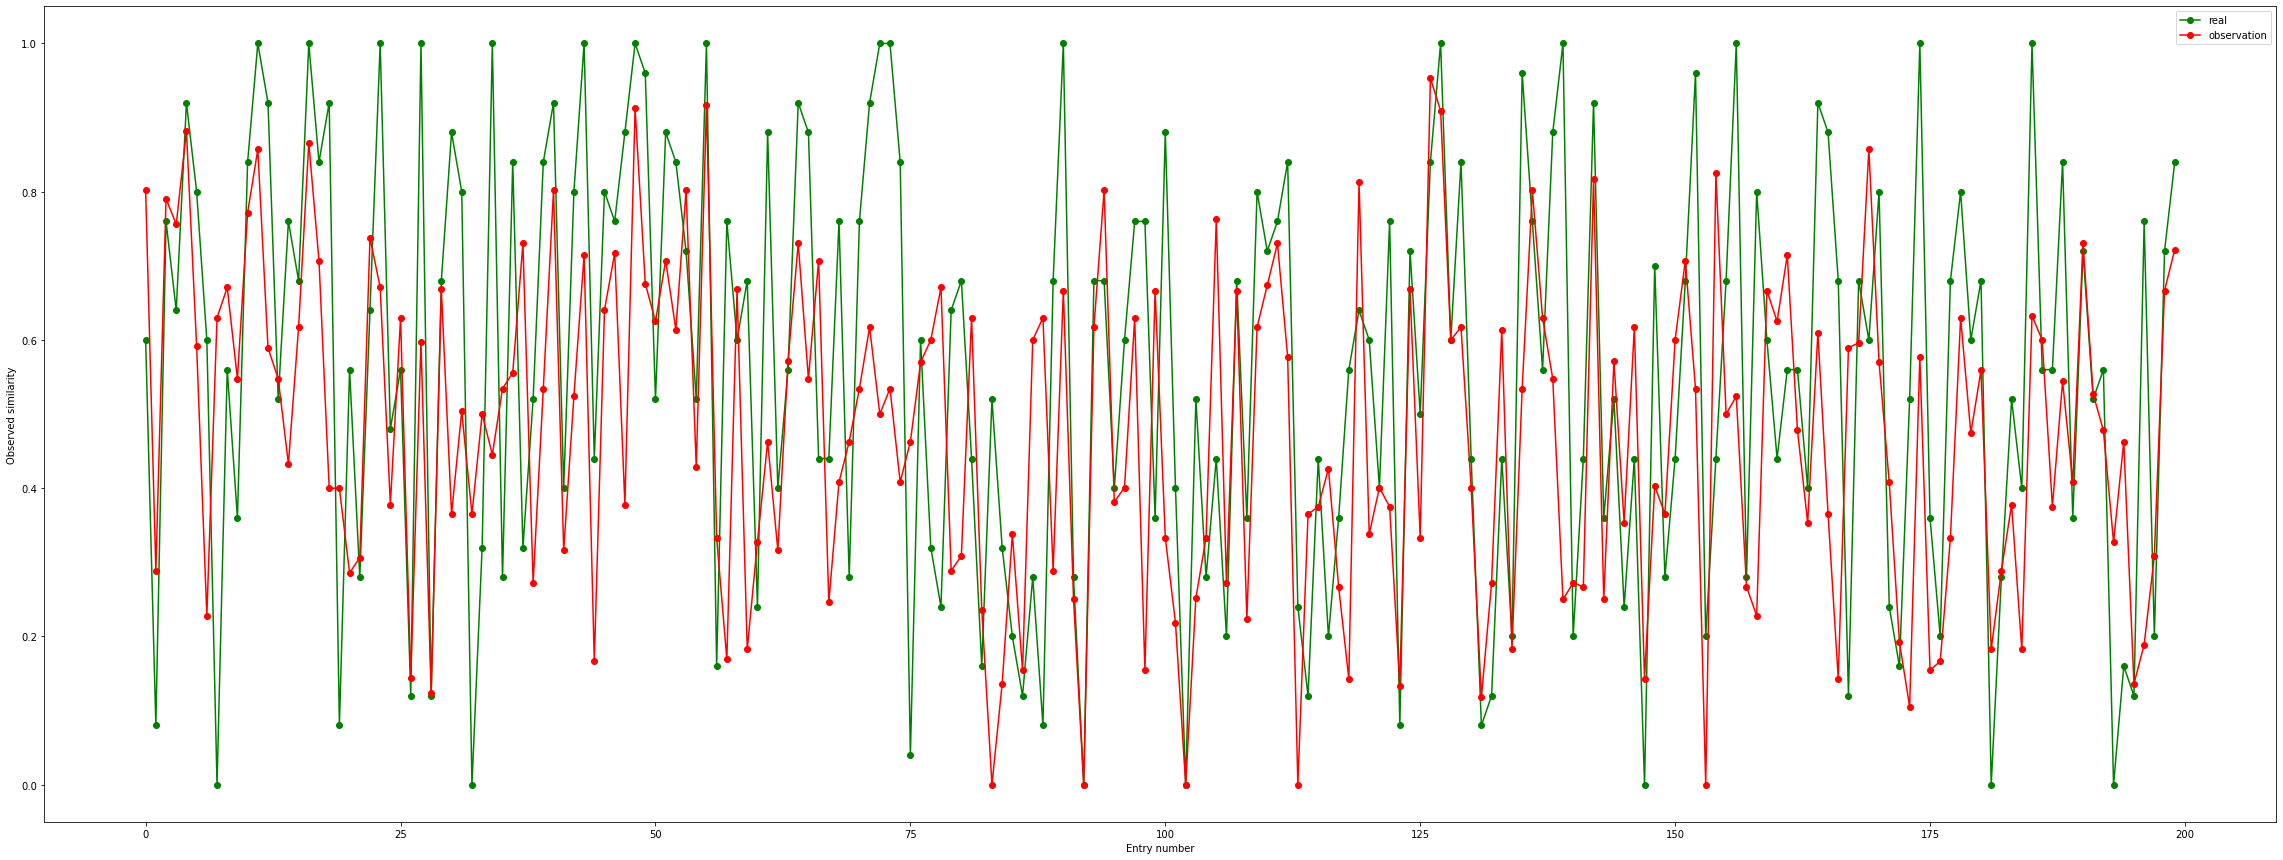

In [63]:
create_plot( [data['score'] for data in parsed_data[:size]] ,prediction_measure )

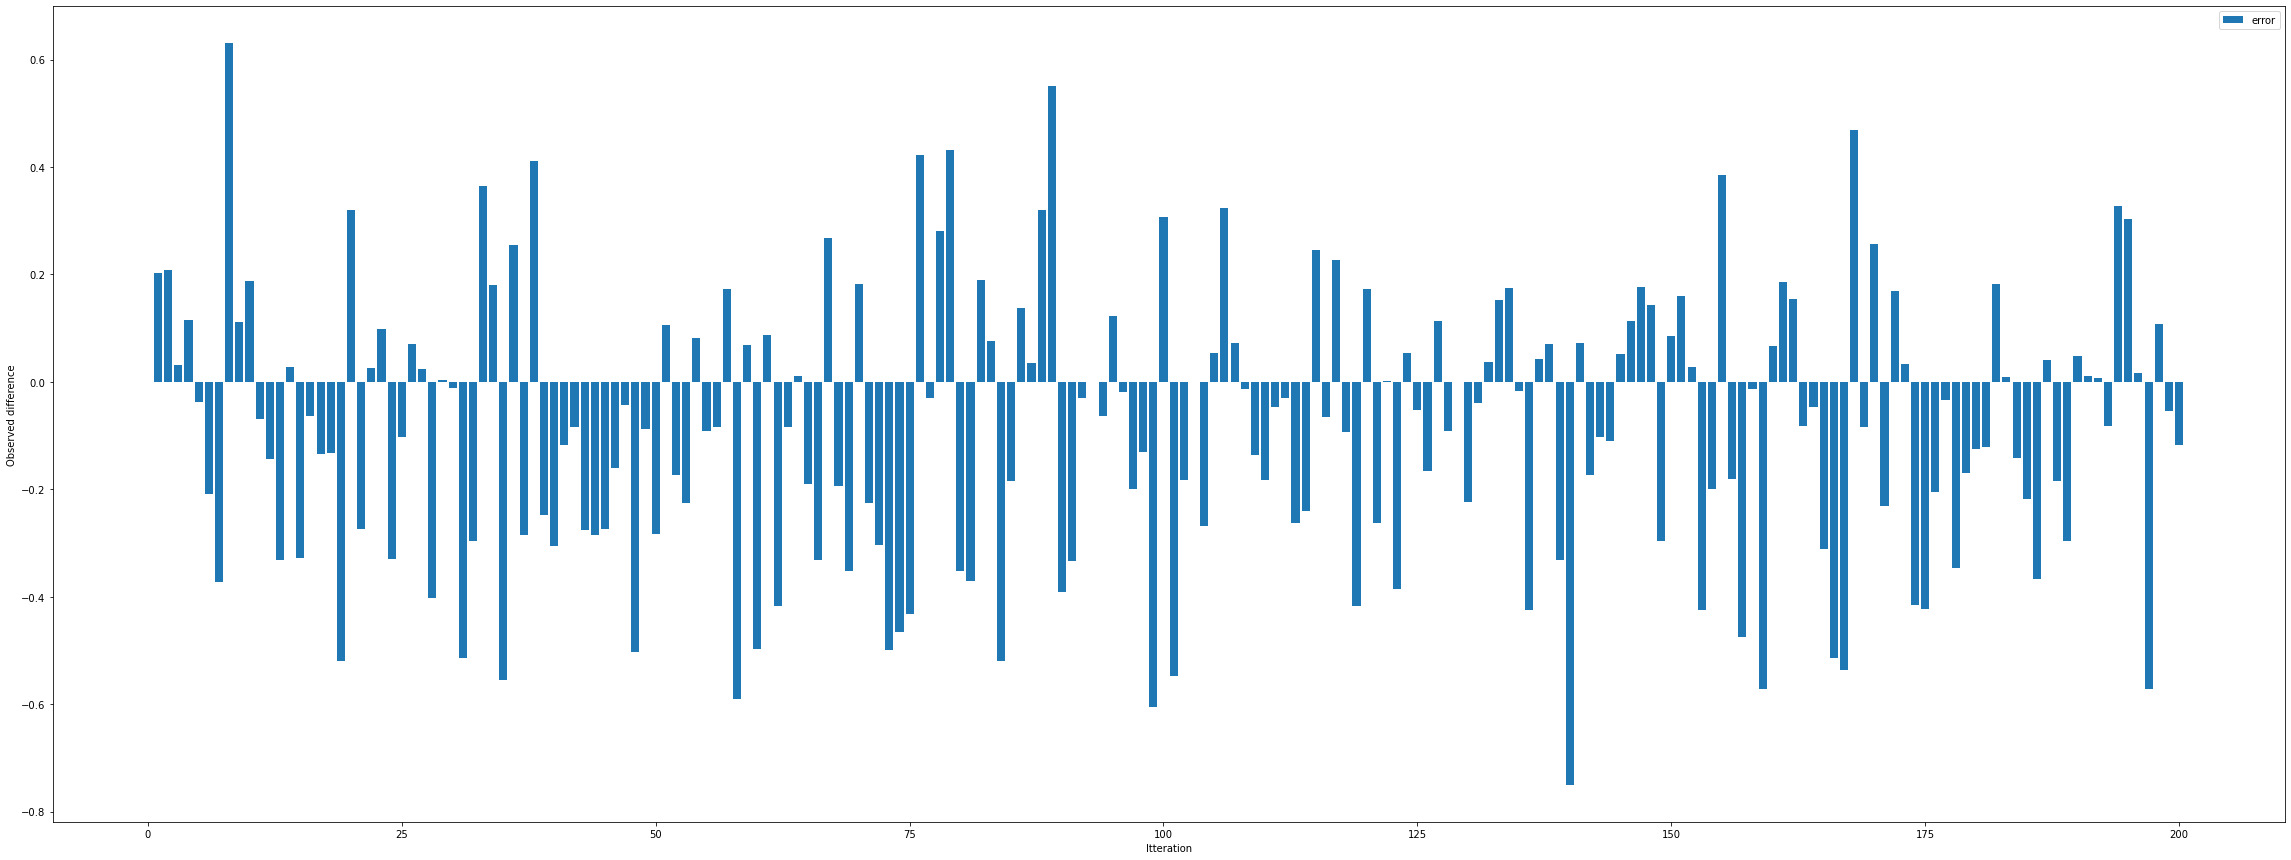

In [64]:
bar_plot(calculated_values)

In [65]:
ur = 0
lr = 0
for i in calculated_values:
    if abs(i)<=0.3:
        lr += 1
    else:
        ur += 1
print(ur, lr)

56 144


In [66]:
# ======== Tf-Idf Sim ===========
from comparisionEngine.cosine_similarity.tfidf_sim import TfidfSim
compEngine = TfidfSim()
calculated_values = []
prediction_measure = []

size = 200
for data in parsed_data[:size]:
    comp_metric = compEngine.rank_documents(data["sentence1"], [data["sentence2"]])[0]
    prediction_measure.append(comp_metric)
    calculated_values.append((comp_metric - data["score"]))
    print(
        "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f},".format(
            abs(comp_metric - data["score"]), comp_metric, data["score"], (comp_metric - data["score"])
        )
    )
print("avg diff : {}".format(sum(calculated_values) / size))
print("variance : {}".format(np.var(calculated_values)))

abs: 0.12,calculation: 0.72, expected: 0.60 dif: 0.12,
abs: 0.11,calculation: 0.19, expected: 0.08 dif: 0.11,
abs: 0.01,calculation: 0.75, expected: 0.76 dif: -0.01,
abs: 0.12,calculation: 0.52, expected: 0.64 dif: -0.12,
abs: 0.05,calculation: 0.87, expected: 0.92 dif: -0.05,
abs: 0.46,calculation: 0.34, expected: 0.80 dif: -0.46,
abs: 0.44,calculation: 0.16, expected: 0.60 dif: -0.44,
abs: 0.45,calculation: 0.45, expected: 0.00 dif: 0.45,
abs: 0.05,calculation: 0.51, expected: 0.56 dif: -0.05,
abs: 0.07,calculation: 0.29, expected: 0.36 dif: -0.07,
abs: 0.50,calculation: 0.34, expected: 0.84 dif: -0.50,
abs: 0.28,calculation: 0.72, expected: 1.00 dif: -0.28,
abs: 0.35,calculation: 0.57, expected: 0.92 dif: -0.35,
abs: 0.14,calculation: 0.38, expected: 0.52 dif: -0.14,
abs: 0.55,calculation: 0.21, expected: 0.76 dif: -0.55,
abs: 0.10,calculation: 0.58, expected: 0.68 dif: -0.10,
abs: 0.66,calculation: 0.34, expected: 1.00 dif: -0.66,
abs: 0.39,calculation: 0.45, expected: 0.84 dif: -0

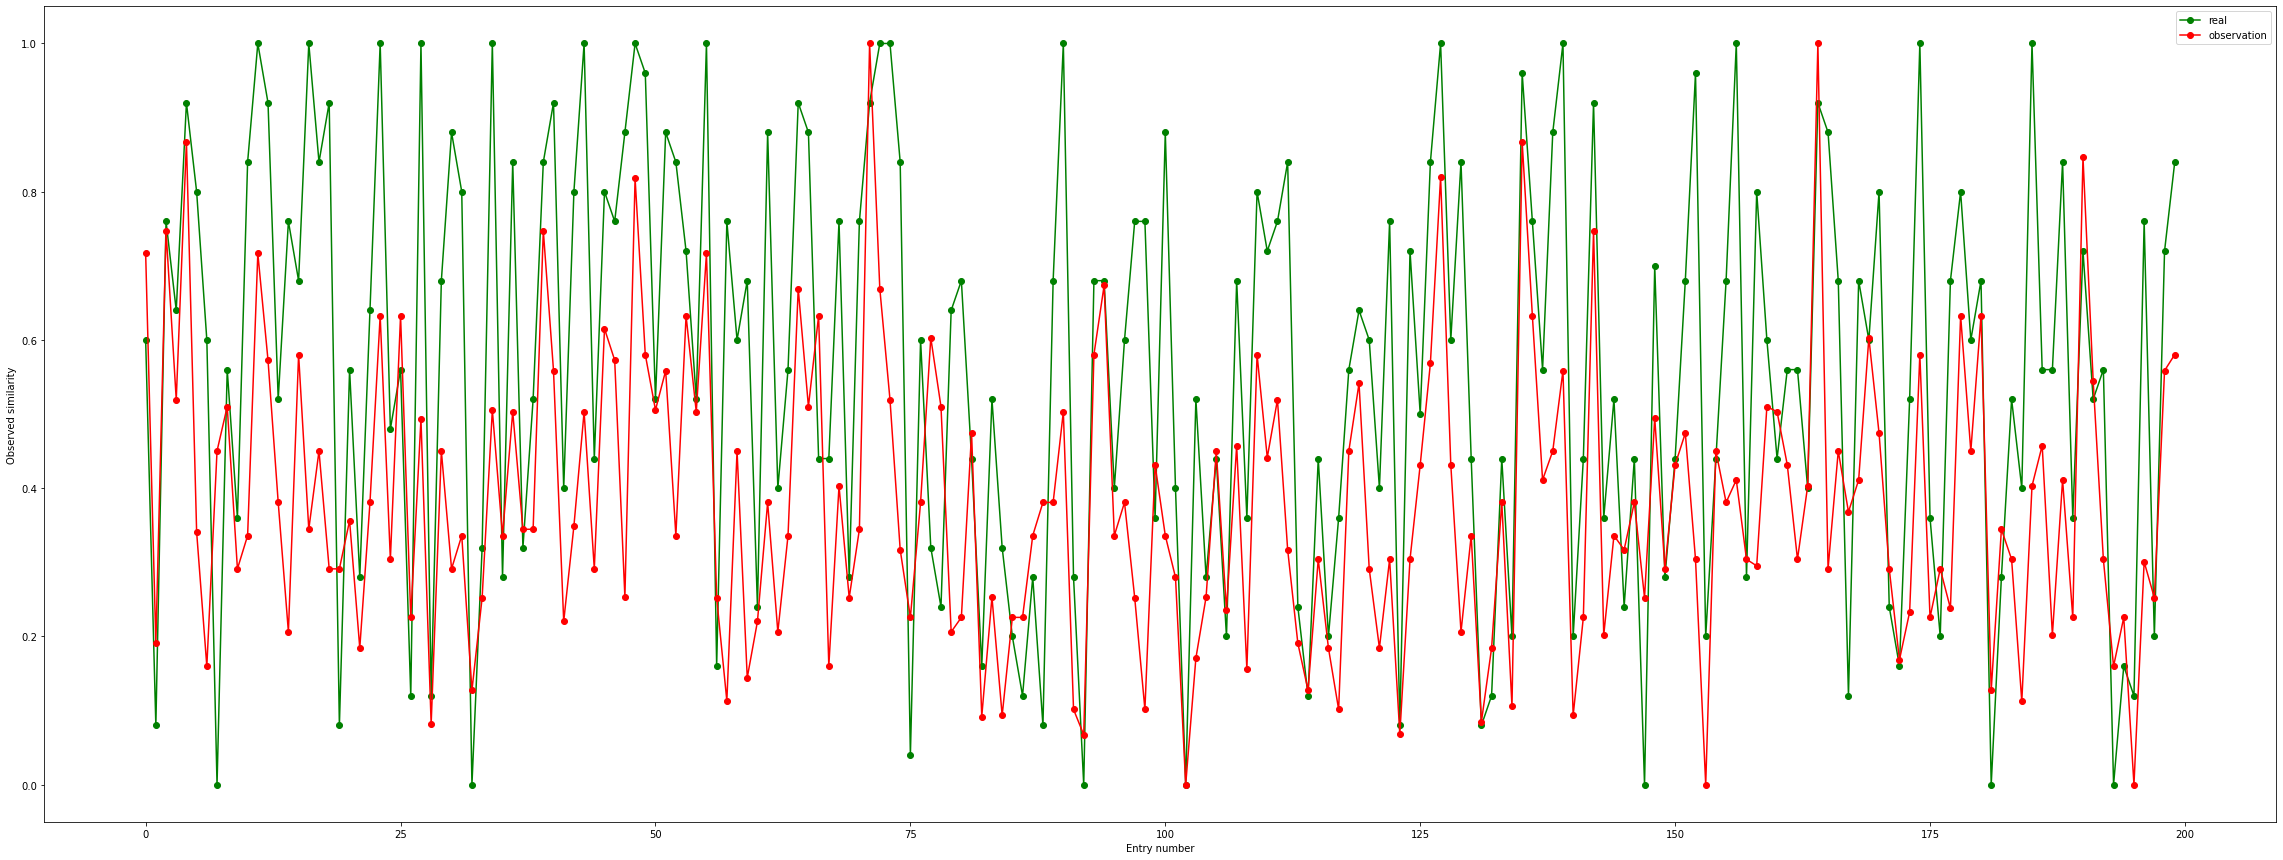

In [67]:
create_plot(
    [data['score'] for data in parsed_data[:size]],
    prediction_measure
)

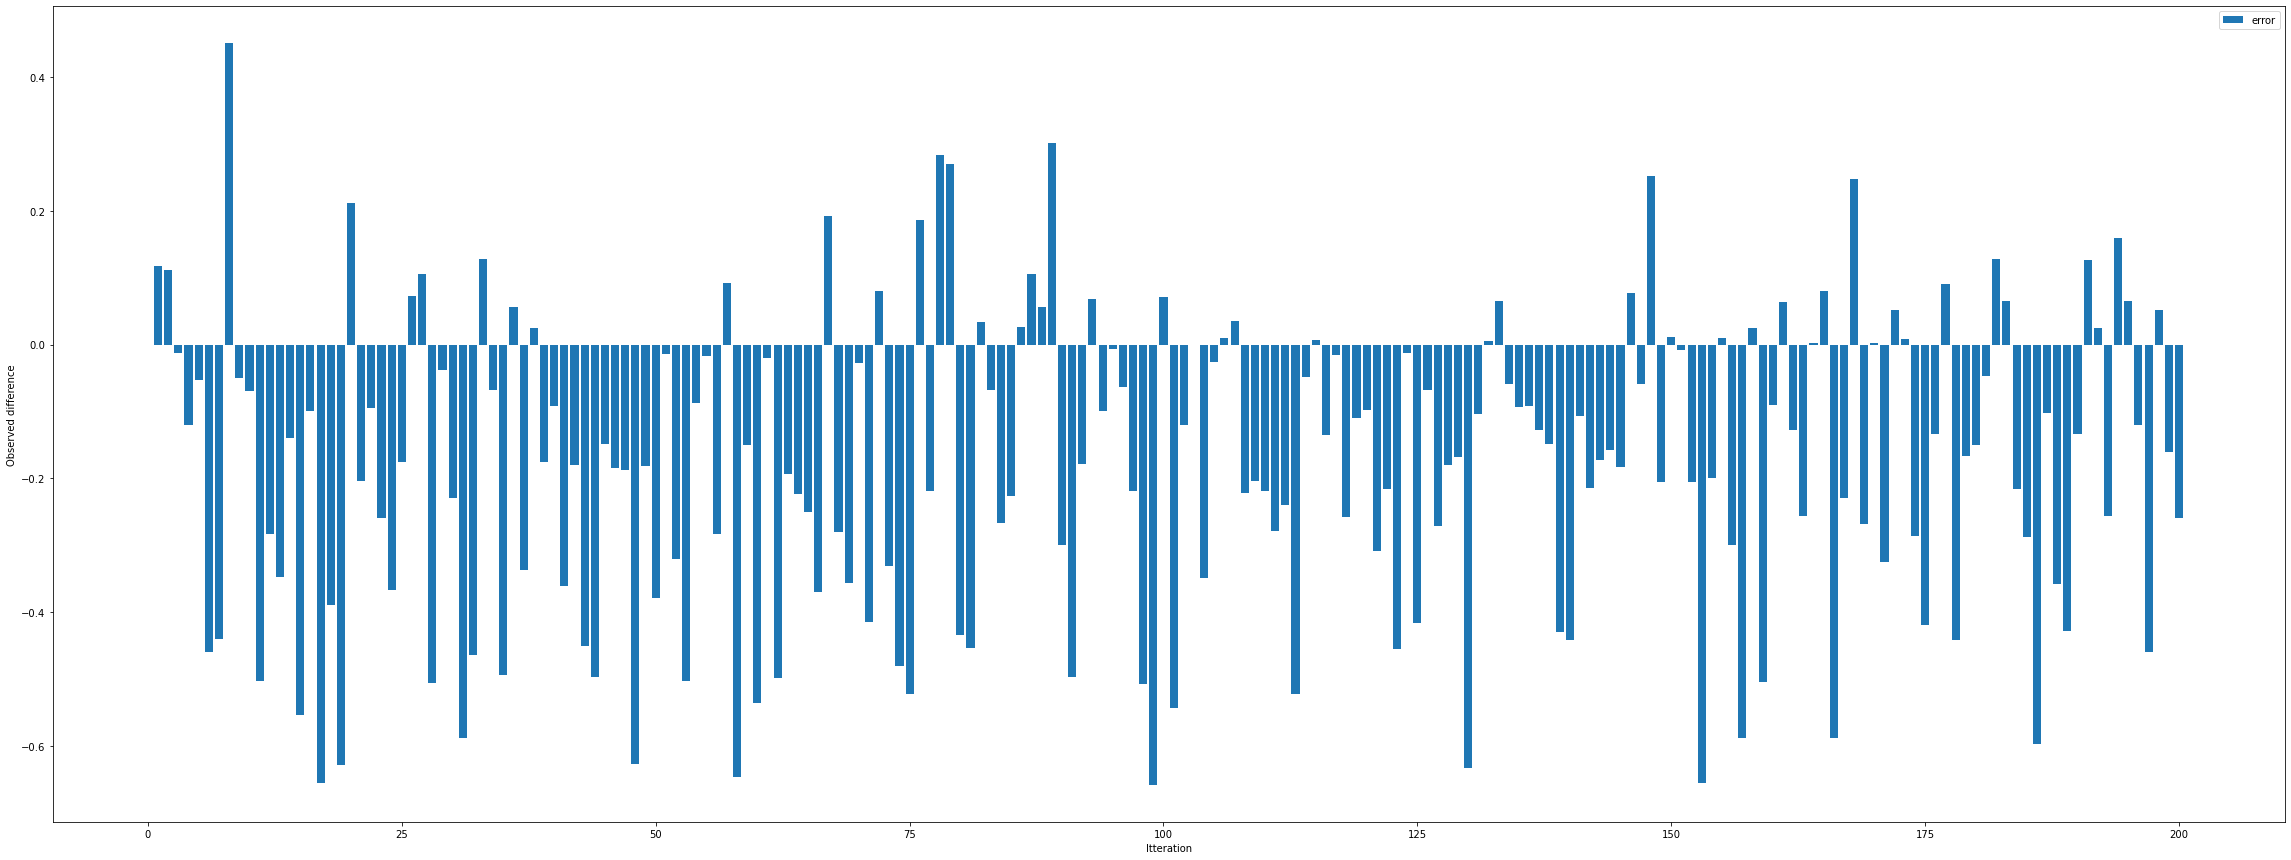

In [68]:
bar_plot(calculated_values)

In [71]:
ur = 0
lr = 0
for i in calculated_values:
    if abs(i)<=0.25:
        lr += 1
    else:
        ur += 1
print(ur, lr)

77 123


### Trained Tf-Idf

In [37]:
file_corpus = read_csv_file_parsed("./dataset/sts_sport.csv")

In [38]:
corpus = []
for f in file_corpus:
    corpus.append(f[0])

In [39]:
# ======== Tf-Idf Sim ===========
compEngine = TfidfSim()
calculated_values = []
prediction_measure = []

size = 1
for data in parsed_data[:size]:
    temp_corpus = ["trees grow apple", "tree give us apples"] + corpus
    comp_metric = compEngine.rank_documents(
        "apples are from tree", temp_corpus
    )[1]
    prediction_measure.append(comp_metric)
    calculated_values.append((comp_metric - data["score"]))
    print(
        "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f},".format(
            abs(comp_metric - data["score"]), comp_metric, data["score"], (comp_metric - data["score"])
        )
    )
print("avg diff : {}".format(sum(calculated_values) / size))

abs: 0.10,calculation: 0.50, expected: 0.60 dif: -0.10,
avg diff : -0.10476898688841291


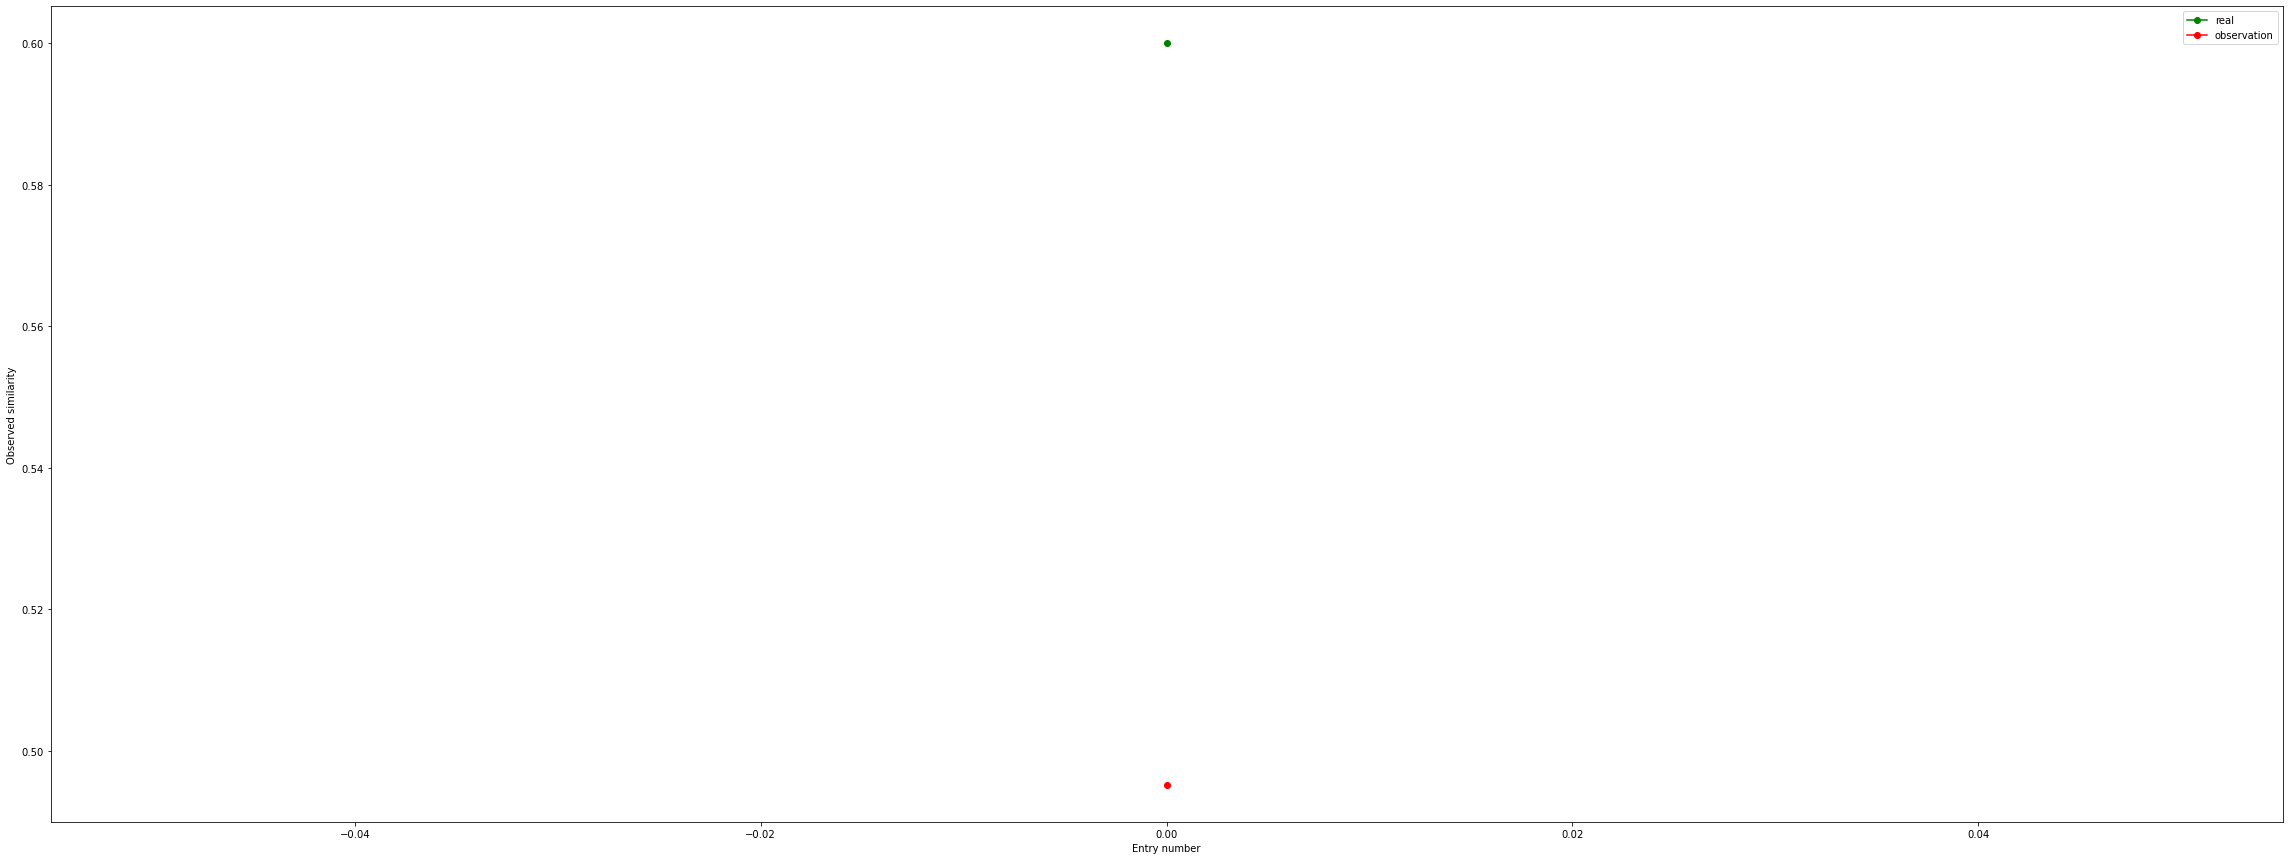

In [40]:
create_plot(
    [data['score'] for data in parsed_data[:size]],
    prediction_measure
)

In [72]:
# ======= word vec sim ==========
from comparisionEngine.cosine_similarity.word_vec_sim import DocSim
compEngine = DocSim(verbose=True)

Loading default GloVe word vector model: glove-wiki-gigaword-50
Model loaded Succesfully


In [73]:
count = 0
calculated_values = []
prediction_measure = []

size = 200
for data in parsed_data[:size]:
    try:
        similarities_array = compEngine.similarity_query(data["sentence1"], [data["sentence2"]])
        if type(similarities_array) == list:
            similarities = similarities_array[0]
        elif type(similarities_array) == float:
            similarities = similarities_array
        elif type(similarities_array) == int:
            similarities = similarities_array
        else:
            similarities = 0.0
        prediction_measure.append(similarities)
        calculated_values.append((similarities - data["score"]))
        # if abs(similarities - data["score"]) <= 0.2:
        print("{0:03}>>>".format(count), end=" ")
        count += 1
        print(
            "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f}".format(
                abs(similarities - data["score"]),
                similarities,
                data["score"],
                (similarities - data["score"])
            )
        )
    except Exception as ex:
        print("======Exception Found======")
        print("...",similarities_array)
        print(ex)
        print(data)
        print("======Exception Found======")
print("avg diff : {}".format(sum(calculated_values) / size))
print("variance : {}".format(np.var(calculated_values)))

000>>> abs: 0.60,calculation: 0.00, expected: 0.60 dif: -0.60


/home/hrs2203/miniconda3/envs/fuzzy/lib/python3.8/site-packages/gensim/similarities/termsim.py:358: RuntimeWarning: divide by zero encountered in true_divide
  Y = np.multiply(Y, 1 / np.sqrt(Y_norm))
/home/hrs2203/miniconda3/envs/fuzzy/lib/python3.8/site-packages/gensim/similarities/termsim.py:358: RuntimeWarning: invalid value encountered in multiply
  Y = np.multiply(Y, 1 / np.sqrt(Y_norm))


001>>> abs: 0.23,calculation: 0.31, expected: 0.08 dif: 0.23
002>>> abs: 0.76,calculation: 0.00, expected: 0.76 dif: -0.76
003>>> abs: 0.64,calculation: 0.00, expected: 0.64 dif: -0.64
004>>> abs: 0.92,calculation: 0.00, expected: 0.92 dif: -0.92
005>>> abs: 0.42,calculation: 0.38, expected: 0.80 dif: -0.42
006>>> abs: 0.20,calculation: 0.40, expected: 0.60 dif: -0.20
007>>> abs: 0.25,calculation: 0.25, expected: 0.00 dif: 0.25
008>>> abs: 0.56,calculation: 0.00, expected: 0.56 dif: -0.56
009>>> abs: 0.03,calculation: 0.39, expected: 0.36 dif: 0.03
010>>> abs: 0.46,calculation: 0.38, expected: 0.84 dif: -0.46
011>>> abs: 1.00,calculation: 0.00, expected: 1.00 dif: -1.00
012>>> abs: 0.92,calculation: 0.00, expected: 0.92 dif: -0.92
013>>> abs: 0.27,calculation: 0.25, expected: 0.52 dif: -0.27
014>>> abs: 0.02,calculation: 0.74, expected: 0.76 dif: -0.02
015>>> abs: 0.03,calculation: 0.65, expected: 0.68 dif: -0.03
016>>> abs: 1.00,calculation: 0.00, expected: 1.00 dif: -1.00
017>>> abs:

134>>> abs: 0.20,calculation: 0.00, expected: 0.20 dif: -0.20
135>>> abs: 0.96,calculation: 0.00, expected: 0.96 dif: -0.96
136>>> abs: 0.76,calculation: 0.00, expected: 0.76 dif: -0.76
137>>> abs: 0.06,calculation: 0.62, expected: 0.56 dif: 0.06
138>>> abs: 0.65,calculation: 0.23, expected: 0.88 dif: -0.65
139>>> abs: 0.71,calculation: 0.29, expected: 1.00 dif: -0.71
140>>> abs: 0.06,calculation: 0.14, expected: 0.20 dif: -0.06
141>>> abs: 0.11,calculation: 0.55, expected: 0.44 dif: 0.11
142>>> abs: 0.92,calculation: 0.00, expected: 0.92 dif: -0.92
143>>> abs: 0.36,calculation: 0.00, expected: 0.36 dif: -0.36
144>>> abs: 0.08,calculation: 0.60, expected: 0.52 dif: 0.08
145>>> abs: 0.14,calculation: 0.38, expected: 0.24 dif: 0.14
146>>> abs: 0.44,calculation: 0.00, expected: 0.44 dif: -0.44
147>>> abs: 0.36,calculation: 0.36, expected: 0.00 dif: 0.36
148>>> abs: 0.51,calculation: 0.19, expected: 0.70 dif: -0.51
149>>> abs: 0.28,calculation: 0.00, expected: 0.28 dif: -0.28
150>>> abs: 0

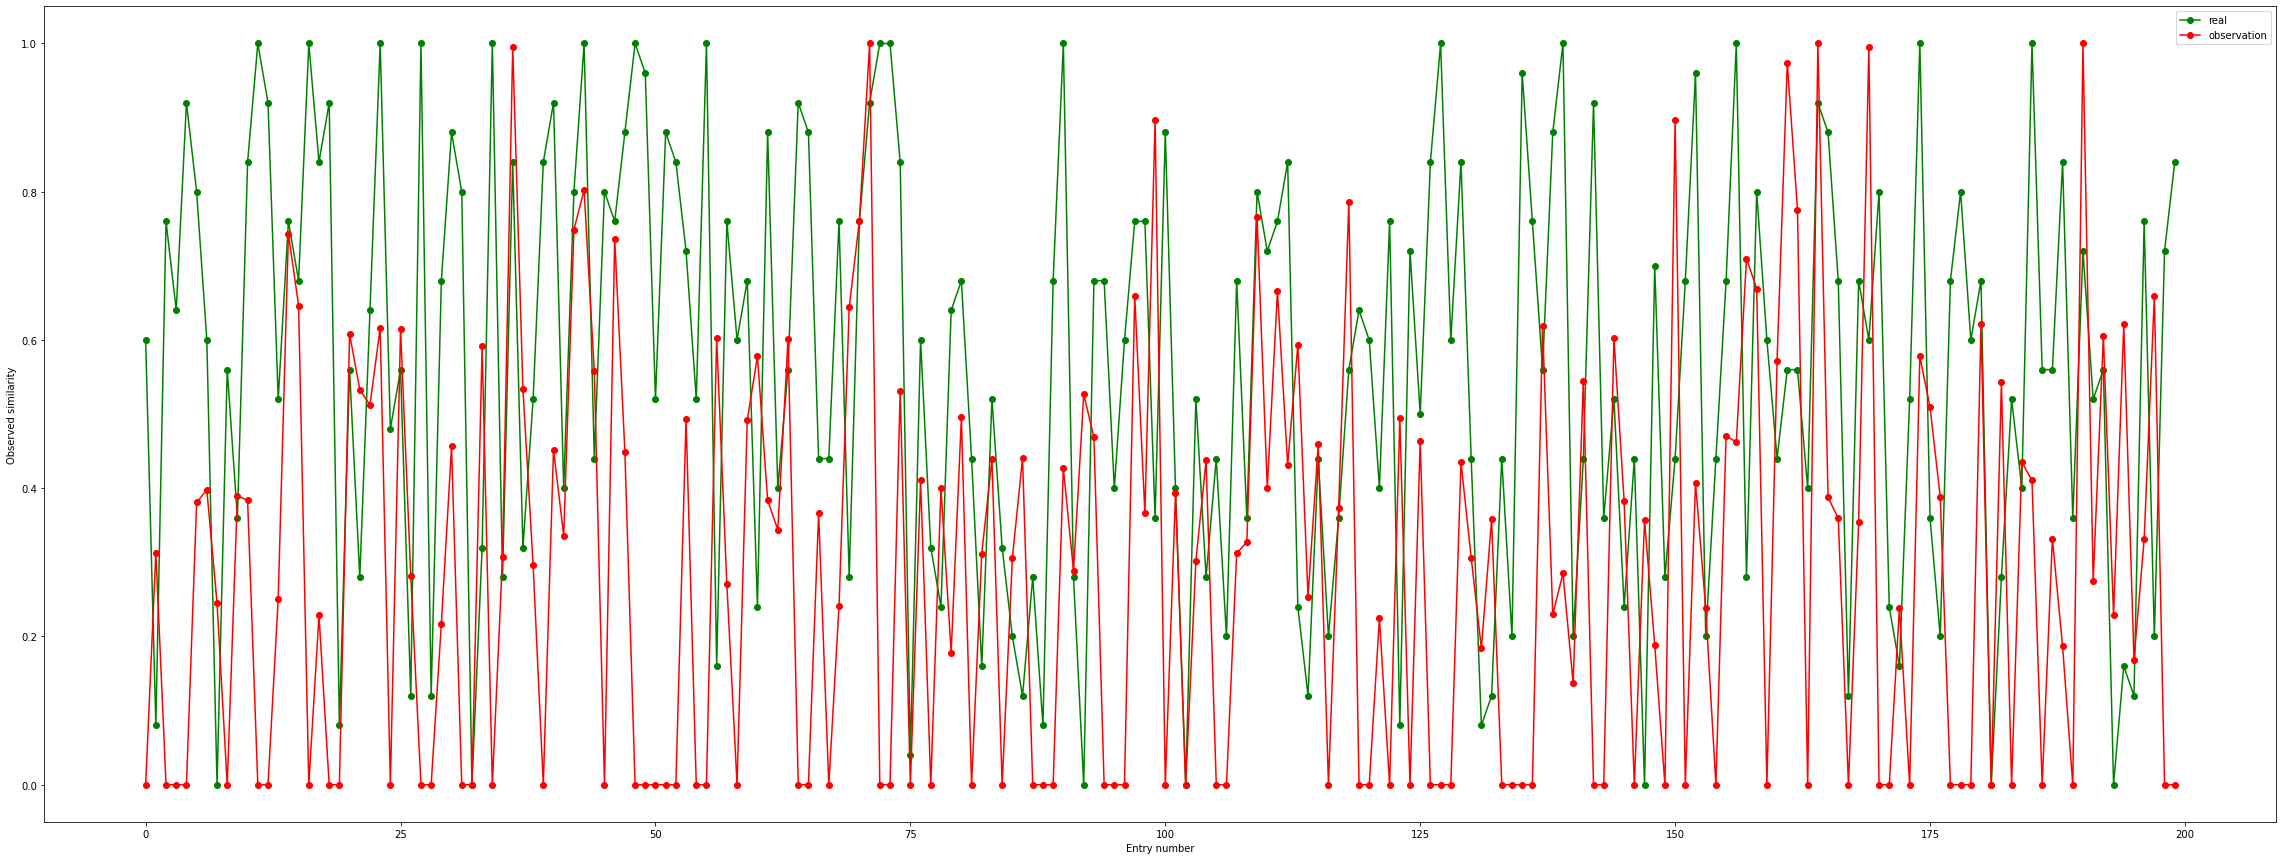

In [74]:
create_plot(
    [data['score'] for data in parsed_data[:size]],
    prediction_measure
)

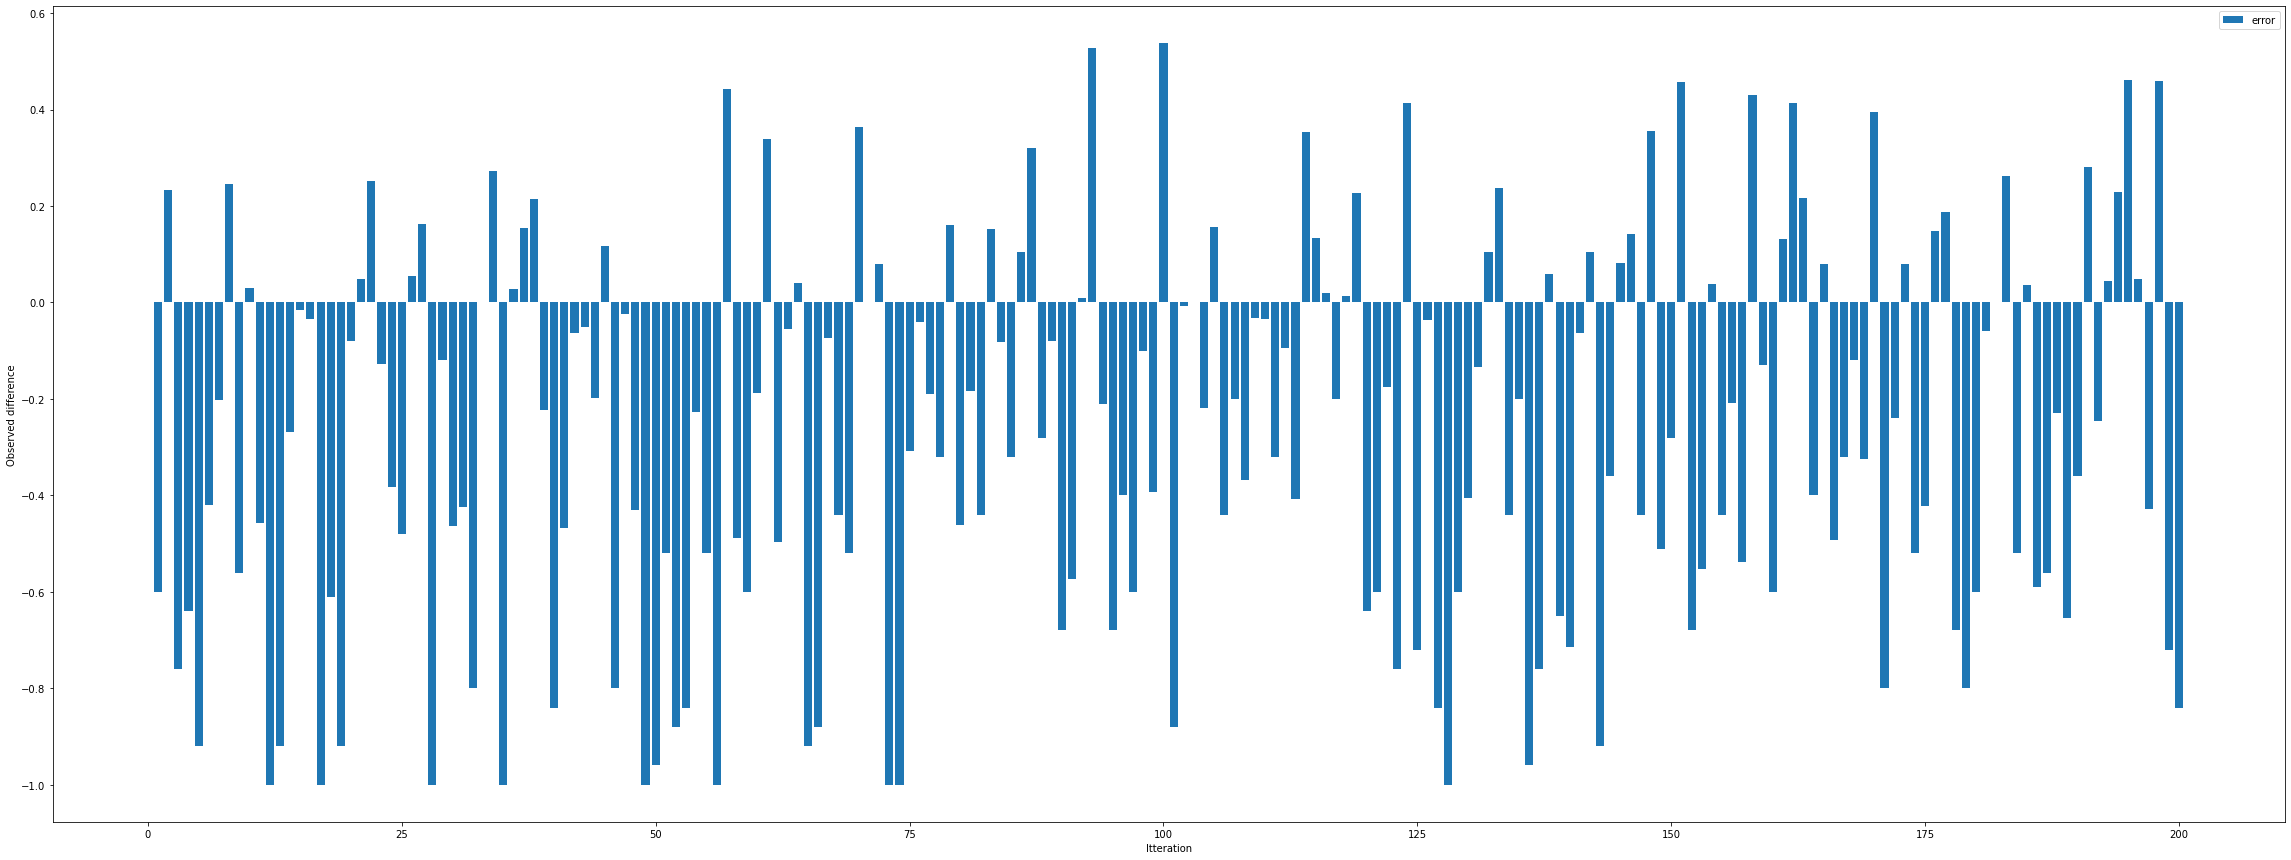

In [75]:
bar_plot(calculated_values)

In [78]:
ur = 0
lr = 0
for i in calculated_values:
    if abs(i)<=0.4:
        lr += 1
    else:
        ur += 1
print(ur, lr)

91 109


In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'this is animal',
    'we is animal',
    'animal are we'
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)


In [ ]:
X.toarray()

In [ ]:
X[0:1].toarray()

In [ ]:
linear_kernel(X[0:1], X)

In [ ]:
linear_kernel(X[0:1], X).flatten()

In [ ]:
import numpy as np

In [ ]:
np.dot(X[0:1], X.T).toarray().flatten()


## Observation

1. To do tf-idf:
    train the model on same data class ( a small topic let say to create a co relation )
    then find the vectorized form for the first 2 vectors and proceed over it
    
    ```
        from sklearn.feature_extraction.text import TfidfVectorizer
        corpus = [
            'sent1',
            'sent2',
            'this is animal',
            'we is animal',
            'animal are we'
        ]
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(corpus)
        print(vectorizer.get_feature_names())
        linear_kernel(X[0:1], X).flatten()       
    ```


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
corpus = data_corpus_to_train(
    read_tsv_file_parsed("./dataset/sts_answer.csv")
)

In [ ]:
corpus = ["China to resume US investment talks", "China and bratain hold nice talks"] + corpus

In [ ]:
print(corpus[:19])

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.shape)

In [ ]:
cp = linear_kernel(X[0:1], X).flatten()

In [ ]:
[item.item() for item in cp[:5]]

In [ ]:
cp[:5]

In [ ]:
2.3/5.0